In [1]:
import time
import urllib.request
import pandas
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups

https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

In [2]:
n_comp = 20
no_top_words = 11
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [3]:
text = urllib.request.urlopen("https://www.gutenberg.org/files/215/215-0.txt")
linelist = []
for line in text:
    txt = line.rstrip().decode("utf-8")
    if txt:
        linelist.append(txt)

In [4]:
cv=CountVectorizer(stop_words='english')
tf = cv.fit_transform(linelist)
tf_feature_names = cv.get_feature_names()

In [5]:
lda = LatentDirichletAllocation(n_components=n_comp, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
come blood shot marked money raging fallen cover credit man got
Topic 1:
valley land hunting donations timber sun load electronic requirements works trademark
Topic 2:
man buck days going red cunning nights ate sweater close longer
Topic 3:
did end know water took good little thing felt charge judge
Topic 4:
protected copyright editions patience steal gray lying coat primitive dim roar
Topic 5:
terms half breed agreement pounds sir refund additional large ration warning
Topic 6:
club law nose wild man pain brother struck slowly fang save
Topic 7:
living comes effort alive mystery active links yellow fiercely lie date
Topic 8:
gutenberg project tm foundation works literary archive donations fell electronic license
Topic 9:
dog including open till ice softly eh say edge silence water
Topic 10:
dogs life old forth place new knew seen hair snow fear
Topic 11:
tax young required gold blows looking exempt struggling pglaf rain bulls
Topic 12:
work françois forest sled laws killed ma

In [6]:
no_features = 1000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(linelist)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [7]:
nmf = NMF(n_components= n_comp, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
buck stood like love saw mates head good backward trouble dave
Topic 1:
gutenberg project tm works electronic license literary foundation trademark archive access
Topic 2:
dogs team outside way harness sled tired perrault fourteen burst mercedes
Topic 3:
thornton john head said shook feet sat camp looked commanded seized
Topic 4:
man red sweater hairy hurled hand throat love brought saw sled
Topic 5:
did know like knew share eyes kindly reason till skeet felt
Topic 6:
life new saved mates passed ecstasy like forest song fall ice
Topic 7:
men carried sought gone outfit need kept woman like second rushed
Topic 8:
day camp night like end days packed sun miserable ere run
Topic 9:
dog driver food husky house eh old lead knew bad heart
Topic 10:
time good away tried old dropped broke days water southland appeared
Topic 11:
came place forth old standing forest effort leadership faint arose sled
Topic 12:
françois perrault till called dat lash strange threw watch canadian sled
Topic 

In [8]:
import nltk
from nltk.corpus import stopwords

In [9]:
tokens = []
for line in linelist:
    tokens.extend(line.split())
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

The:181
Project:79
Gutenberg:22
EBook:2
Call:6
Wild,:2
Jack:4
London:4
This:34
eBook:5
use:9
anyone:4
anywhere:2
United:15
States:8
parts:4
world:12
cost:2
almost:9
restrictions:2
whatsoever.:2
You:14
may:19
copy:8
it,:45
give:8
away:28
re-use:2
terms:19
License:8
included:3
online:4
www.gutenberg.org.:2
If:16
located:7
States,:4
check:5
laws:9
country:9
using:6
ebook.:2
Title::1
Wild:2
Author::1
Release:1
Date::1
July:1
1,:1
2008:1
[EBook:1
#215]:1
Last:1
updated::1
August:1
30,:1
2019:1
Language::1
English:2
Character:1
set:13
encoding::1
UTF-8:1
***:4
START:1
OF:12
THIS:5
PROJECT:4
GUTENBERG:3
EBOOK:2
THE:8
CALL:2
WILD:2
Produced:2
Ryan,:2
Kirstin,:2
Linda:2
Rick:2
Trapp,:2
David:2
Widger:2
cover:4
Contents:1
Chapter:14
I.:2
Into:3
Primitive:2
II.:2
Law:2
Club:2
Fang:3
III.:2
Dominant:2
Primordial:2
Beast:2
IV.:2
Who:2
Has:2
Won:2
Mastership:2
V.:2
Toil:2
Trace:2
VI.:2
For:23
Love:2
Man:3
VII.:2
Sounding:2
“Old:1
longings:1
nomadic:1
leap,:3
Chafing:1
custom’s:1
chain;:1
Again:6
bru

frost:6
soon:2
shivering:2
Miserable:1
disconsolate,:1
wandered:5
tents,:1
find:5
place:14
another.:4
neck-hair:1
snarled:1
(for:1
learning:1
fast),:1
unmolested.:1
Finally:1
idea:1
return:6
team-mates:1
making:8
astonishment,:1
disappeared.:1
camp,:17
returned.:1
Were:1
tent?:1
No,:1
be,:2
possibly:2
be?:1
drooping:2
body,:6
forlorn:1
indeed,:1
aimlessly:1
circled:7
tent.:1
Suddenly:1
fore:11
legs:11
Something:3
wriggled:2
unseen:2
unknown.:1
yelp:3
reassured:1
investigate.:1
whiff:1
air:8
ascended:2
nostrils,:1
there,:6
curled:2
snug:2
ball,:1
Billee.:1
whined:4
placatingly,:1
squirmed:1
intentions,:1
ventured,:1
bribe:1
lick:2
wet:2
Another:3
eh?:1
confidently:2
selected:1
spot,:3
fuss:1
waste:1
effort:4
dig:1
hole:5
himself.:3
trice:2
heat:3
confined:1
space:3
asleep.:2
arduous,:1
slept:3
soundly:2
comfortably,:1
wrestled:2
dreams.:2
Nor:2
roused:1
noises:2
waking:2
snowed:2
completely:1
buried.:1
walls:1
pressed:2
surge:1
swept:5
him—the:1
trap.:1
token:2
harking:1
lives:3
forebea

shriek.:1
cry:6
Life:2
plunging:1
Life’s:1
apex:1
grip:2
Death,:2
hell’s:1
chorus:2
shoulder,:1
missed:1
powdery:1
overthrown,:1
slashing:1
clear.:1
Twice:2
clipped:1
together,:5
steel:2
trap,:1
better:3
footing,:1
writhed:2
snarled.:1
keenly:2
watchful:1
advantage,:1
familiarity.:1
remember:1
all,—the:1
woods,:3
earth,:3
moonlight,:1
thrill:1
battle.:2
Over:1
whiteness:1
silence:4
brooded:2
ghostly:3
calm.:1
whisper:1
air—nothing:1
moved,:1
leaf:1
quivered,:2
visible:1
breaths:5
rising:4
lingering:1
frosty:1
short:4
ill-tamed:1
wolves;:2
drawn:2
expectant:1
They,:1
silent,:2
gleaming:3
drifting:2
upward.:1
strange,:1
been,:2
wonted:1
things.:4
practised:2
fighter.:1
Arctic,:1
Canada:1
Barrens,:1
mastery:1
Bitter:1
his,:2
rage.:4
rend:2
destroy,:1
enemy:1
destroy.:2
rush;:1
attacked:2
defended:1
attack.:1
strove:2
fangs:3
softer:1
flesh,:2
countered:1
clashed:1
bleeding,:2
penetrate:1
enemy’s:1
guard.:1
warmed:1
enveloped:1
whirlwind:2
rushes.:1
Time:3
bubbled:1
rushing,:2
drawing:1
cu

fissures:1
apart,:2
sections:1
bodily:1
river.:2
amid:4
bursting,:1
rending,:2
throbbing:1
soft-sighing:1
breezes,:1
wayfarers:1
woman,:1
falling,:2
riding,:1
swearing:1
innocuously,:1
wistfully:1
watering,:1
John:39
Thornton’s:20
River.:1
halted,:1
Thornton.:8
painstakingly:1
stiffness.:2
Thornton:60
whittling:1
touches:1
axe-handle:1
birch.:1
whittled:1
listened,:1
monosyllabic:1
replies,:1
asked,:2
terse:1
advice:1
certainty:1
followed.:2
“They:2
us:4
dropping:1
over,”:1
response:1
chances:1
rotten:2
couldn’t:1
River,:2
are.”:1
sneering:1
ring:1
triumph:1
true,”:1
answered.:1
bottom’s:1
fools,:2
luck:1
straight,:1
Alaska.”:1
“That’s:1
suppose,”:1
Hal.:1
same,:1
we’ll:1
Dawson.”:2
uncoiled:1
“Get:2
Buck!:2
Hi!:1
Get:1
there!:1
Mush:1
on!”:1
whittling.:1
idle,:1
fool:1
folly;:1
fools:1
alter:1
scheme:1
stage:1
rouse:2
merciless:2
errands.:1
compressed:1
lips.:1
next,:1
painful:1
efforts.:1
effort.:1
fallen.:1
struggled.:1
speak,:1
mind.:2
moisture:1
continued,:1
walked:2
irresolutely:

scale.:1
cunning;:1
intelligence,:1
intelligence:1
intelligence;:1
plus:1
schools,:1
creature:3
roamed:2
carnivorous:1
diet,:1
flower,:1
high:3
tide:1
overspilling:1
caressing:1
discharging:1
magnetism:1
contact.:1
brain:1
nerve:2
tissue:1
keyed:1
pitch;:1
equilibrium:1
adjustment.:1
events:1
responded:3
lightning-like:1
rapidity.:1
Quickly:1
quickly.:1
compass:1
hearing.:1
perceived:1
determined:1
instant.:1
perceiving,:1
determining,:1
responding:1
sequential;:1
infinitesimal:1
intervals:1
simultaneous.:1
vitality,:1
sharply,:1
springs.:1
streamed:1
flood,:1
asunder:1
pour:1
world.:1
marching:2
“When:1
mould:2
broke,”:1
jingo!:1
mineself,”:1
affirmed.:1
transformation:1
secrecy:1
marched.:1
stealing:2
cat-footed,:1
cover,:1
snake,:1
snake:2
strike.:1
ptarmigan:1
chipmunks:1
fleeing:1
Fish,:1
pools,:1
beaver,:1
mending:1
dams,:1
wary.:1
eat,:1
wantonness;:1
preferred:1
lurking:1
humor:1
deeds,:1
squirrels,:1
go,:1
mortal:1
treetops.:1
moose:5
abundance,:1
meet:2
rigorous:1
valleys.:1


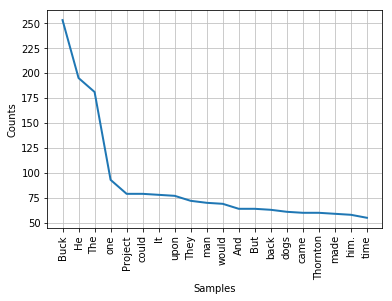

In [10]:
freq.plot(20, cumulative=False)